In [17]:
import ugradio
import numpy as np
from astropy import units as u
from astropy import constants as c
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
from scipy.optimize import curve_fit

In [33]:
bb_data = pd.read_csv('cal_data.csv')
bb_f = bb_data['f'][93:1840]*1e-6
bb_a = bb_data['a'][93:1840]

sky_data = pd.read_csv('sec8_data.csv')
sky_f = sky_data['f'][93:1840]*1e-6
sky_a = sky_data['a'][93:1840]

<IPython.core.display.Javascript object>


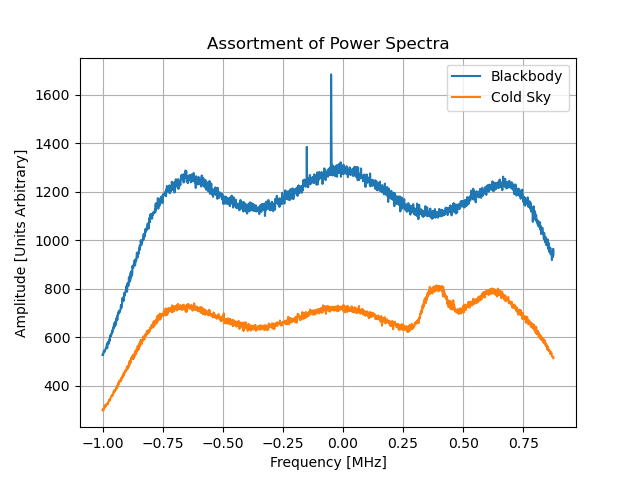

In [34]:
plt.figure()
plt.grid()
plt.title('Assortment of Power Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.plot(bb_f, bb_a, label = "Blackbody")
plt.plot(sky_f, sky_a, label = "Cold Sky")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


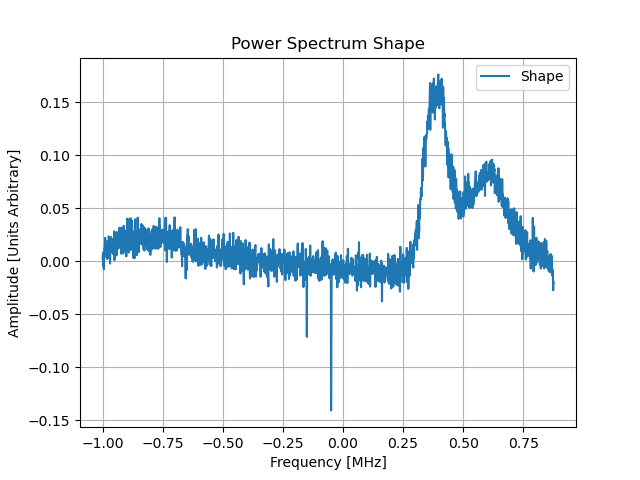

In [35]:
s_shape = sky_a / bb_a - 0.565

plt.figure()
plt.grid()
plt.title('Power Spectrum Shape')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.plot(bb_f, s_shape, label = "Shape")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


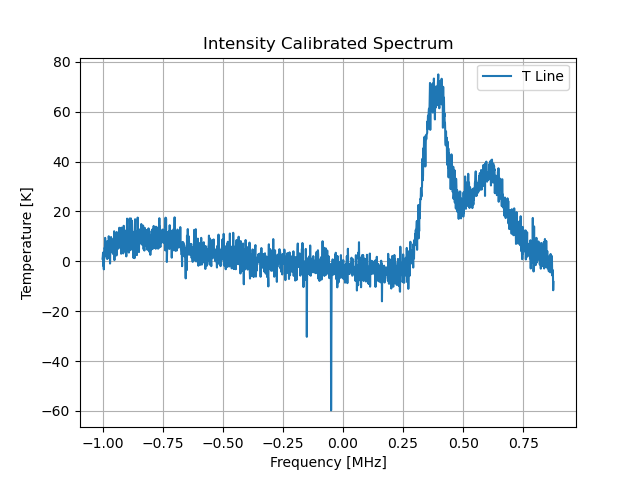

In [36]:
diff = np.sum(bb_a - sky_a)
G = 300/diff * np.sum(sky_a)
t_line = G * s_shape

plt.figure()
plt.grid()
plt.title('Intensity Calibrated Spectrum')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.plot(bb_f, t_line, label = "T Line")
plt.legend()
plt.show()

In [37]:
v = - bb_f/1420.4 * c.c.to(u.km/u.s)
dop_corr = ugradio.doppler.get_projected_velocity(151,37.87,22053).to(u.km/u.s)
v_corr = v+dop_corr

/usr/local/lib/python3.9/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.9/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.9/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "epv00" yielded 1 of "warning: date outsidethe range 1900-2100 AD"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.9/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.9/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "plan94" yielded 1 of "warning: year outside 1000-3000"
  warnings.warn('ERFA funct

<IPython.core.display.Javascript object>


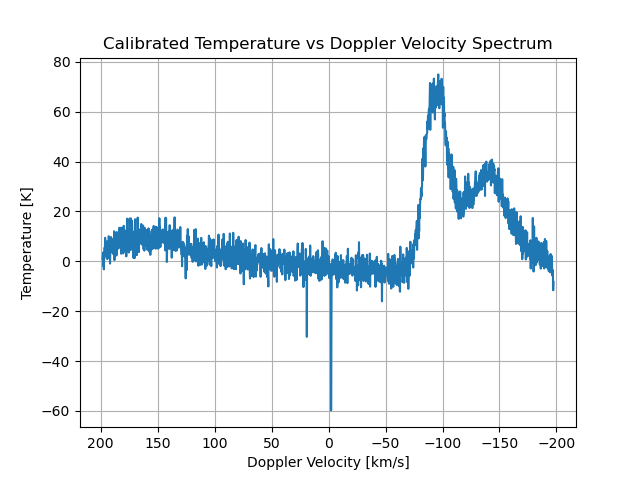

In [38]:
fig, ax = plt.subplots()
plt.grid()
plt.title('Calibrated Temperature vs Doppler Velocity Spectrum')
plt.xlabel('Doppler Velocity [km/s]')
ax.invert_xaxis()
plt.ylabel('Temperature [K]')
plt.plot(v_corr, t_line)
#plt.savefig("calibrated_spectrum.png")

In [39]:
#truncate the data even more
bb_f = bb_f[890:1723]
bb_a = bb_a[890:1723]

sky_f = sky_f[890:1723]
sky_a = sky_a[890:1723]

In [58]:
s_shape = sky_a / bb_a - 0.558
diff = np.sum(bb_a - sky_a)
G = 300/diff * np.sum(sky_a)
t_line = G * s_shape

v = - bb_f/1420 * c.c.to(u.km/u.s)
dop_corr = ugradio.doppler.get_projected_velocity(151,37.87,22053).to(u.km/u.s)
v_corr = v + dop_corr

/usr/local/lib/python3.9/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.9/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.9/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "epv00" yielded 1 of "warning: date outsidethe range 1900-2100 AD"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.9/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.9/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "plan94" yielded 1 of "warning: year outside 1000-3000"
  warnings.warn('ERFA funct

<IPython.core.display.Javascript object>


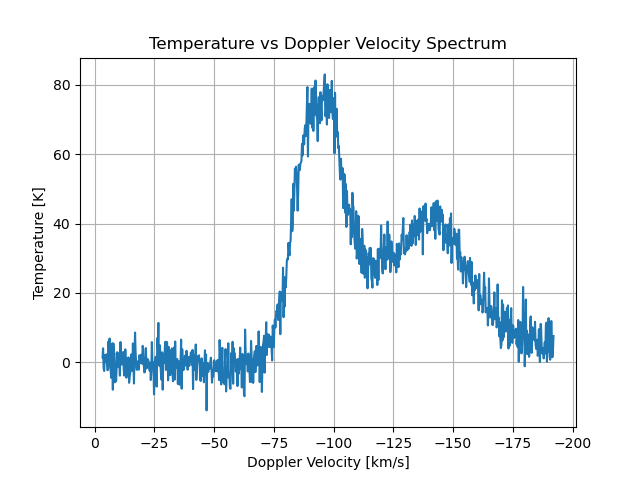

In [59]:
fig, ax = plt.subplots()
plt.grid()
plt.title('Temperature vs Doppler Velocity Spectrum')
plt.xlabel('Doppler Velocity [km/s]')
ax.invert_xaxis()
plt.ylabel('Temperature [K]')
plt.plot(v+dop_corr, t_line)
plt.show()

In [60]:
gaussian_fit, cov = ugradio.gauss.gaussfit(x = np.array((v+dop_corr)),
                                      y = np.array((t_line)), 
                                      amp = [70, 30], 
                                      avg = [-90, -140], 
                                      sig = [40, 60],
                                     return_cov=True)
gaussian_fit

{'amp': array([74.20159802, 39.5079321 ]),
 'avg': array([ -93.921873  , -138.47162202]),
 'sig': array([ 9.68901069, 20.93171965])}

In [61]:
gaussian_val = ugradio.gauss.gaussval(np.array(v+dop_corr), 
                                     gaussian_fit['amp'],
                                     gaussian_fit['avg'],
                                     gaussian_fit['sig'])

<IPython.core.display.Javascript object>


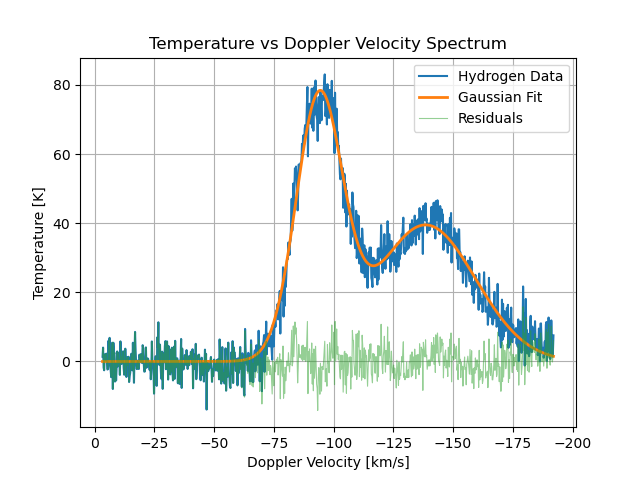

In [63]:
fig, ax = plt.subplots()
plt.grid()
plt.title('Temperature vs Doppler Velocity Spectrum')
plt.xlabel('Doppler Velocity [km/s]')
ax.invert_xaxis()
plt.ylabel('Temperature [K]')
plt.plot(v_corr, t_line, label='Hydrogen Data')
plt.plot(v_corr, gaussian_val, lw=2, label='Gaussian Fit')
plt.plot(v_corr, t_line - ugradio.gauss.gaussval(np.array(v_corr), **gaussian_fit), alpha=0.5, lw=0.8, label='Residuals')
plt.legend()
plt.savefig("Observation_Spectrum.png")

In [30]:
def chisq(ys, mdl, sig):
    return np.sum(np.abs(ys-mdl)**2/sig**2)

def reduced_chisq(ys, mdl, sig):
    return np.sum(np.abs(ys-mdl)**2/sig**2) / (len(ys) - 6)

In [31]:
sigma_i = np.std(t_line[-100:])

In [32]:
reduced_chisq(t_line, gaussian_val, sigma_i)

1.1409832578616137

In [ ]:
ugradio.gauss.gaussfit??